In [ ]:
#Q1. Create a contrived 2-class dataset that are non-linearly separable. Each sample is 2-dimensional. Plot the dataset using 2-d plot

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [18]:
x = np.array([1,1,2,3,3,6,6,6,9,9,10,11,12,13,16,18])
y = np.array([18,13,9,6,15,11,6,3,5,2,10,5,6,1,3,1])
label = np.array([1,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1])

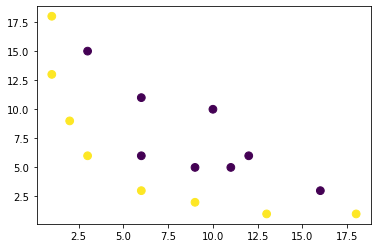

In [19]:
fig= plt.figure()
plt.scatter(x,y,c=label,s=60)
plt.show()

In [20]:
#Write a program to visualize Gaussian kernel with various values for σ and μ¶

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import multivariate_normal

x,y = np.mgrid[-10.0:10.0:30j ,-10.0:10.0:30j]

xy = np.column_stack([x.flat,y.flat])

mu = np.array([0.7,0.7])

sigma = np.array([1,1])
covariance = np.diag(sigma**2)

z=multivariate_normal.pdf(xy,mean=mu, cov=covariance)

z=z.reshape(x.shape)

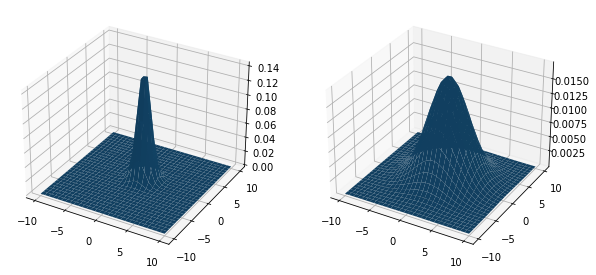

In [22]:
fig = plt.figure()

fig.set_figwidth(10)
fig.set_figheight(10)


ax = fig.add_subplot(121,projection = '3d')

ax.plot_surface(x,y,z)

mu = np.array([0.7,0.7])

sigma = np.array([3,3])
covariance = np.diag(sigma**2)

z=multivariate_normal.pdf(xy,mean=mu, cov=covariance)

z=z.reshape(x.shape)

ax = fig.add_subplot(122,projection ='3d')

ax.plot_surface(x,y,z)

plt.show()

In [23]:
#Generate classification dataset with 2 classes where each sample is in 2-d space.
#Use function make_gaussian_quantiles

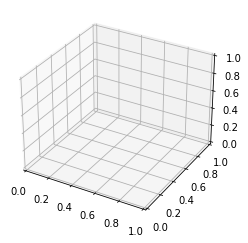

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process.kernels import RBF
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler


fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

colors={
0: '#b40426',
1: '#3b4cc0',
2: '#f2da0a',
3: '#fe5200'}


X,y = make_gaussian_quantiles(n_features=2,n_classes=2, n_samples=2500, mean=(2,3))

In [25]:
#Convert above dataset into 3d using RBF function and plot the dataset

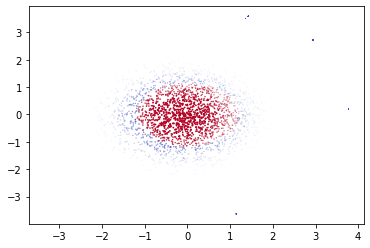

In [26]:
scaler = StandardScaler()
scaler.fit(X)
X= scaler.transform(X)

z=RBF(0.5).__call__(X)[0]

colors = list(map(lambda x: colors[x],y))
ax.scatter(X[:,0],X[:,1],z,c=colors, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

plt.scatter(X[:,0],X[:,1],z,c=colors,marker='o')

In [27]:
#Fit the dataset created in Q.3 using SVM classifier with kernel = rbf, linear, and poly and various values for penalty term C. You may split the dataset into 80%-20% split. Plot 3 accuracy graphs. One with RBF with varying C. Second with Linear with varying C. Third with Polynomial kernel with varying C

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_gaussian_quantiles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix , accuracy_score
#from mlxend.plotting import plot_decision_regions

from sklearn import metrics

In [29]:
X,y = make_gaussian_quantiles(n_features=2,n_classes=2, n_samples=2500, mean=(2,3))

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.20,random_state = 42)


In [30]:
acc1=[]
ivalue=[]
for i in range(1,20):
    svm= SVC(random_state=42,kernel = 'rbf', C=i)
    svm=svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)
    acc=metrics.accuracy_score(y_test,y_pred)
    ivalue.append(i)
    acc1.append(acc)
print(acc1)

[0.994, 0.992, 0.992, 0.994, 0.994, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.988, 0.988, 0.988, 0.99, 0.988]


Text(0, 0.5, 'Accuracy')

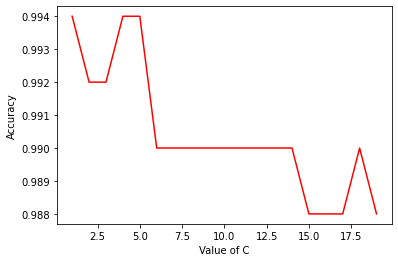

In [31]:
plt.plot(ivalue,acc1,color='red')
plt.xlabel("Value of C")
plt.ylabel("Accuracy")

In [32]:
acc3=[]
ivalue3=[]
for i in range(1,20):
    svm= SVC(kernel = 'linear', C=i)
    svm=svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)
    acc=metrics.accuracy_score(y_test,y_pred)
    ivalue3.append(i)
    acc3.append(acc)
print(acc3)

[0.628, 0.628, 0.628, 0.628, 0.628, 0.628, 0.628, 0.628, 0.63, 0.63, 0.63, 0.628, 0.628, 0.628, 0.63, 0.628, 0.628, 0.628, 0.628]


Text(0, 0.5, 'Accuracy')

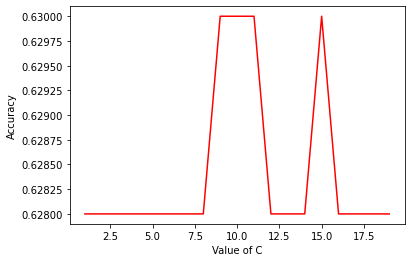

In [33]:
plt.plot(ivalue3,acc3,color='red')
plt.xlabel("Value of C")
plt.ylabel("Accuracy")

In [34]:
acc2=[]
ivalue2=[]
for i in range(1,20):
    svm= SVC(kernel = 'poly',degree=3, C=i)
    svm=svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)
    acc=metrics.accuracy_score(y_test,y_pred)
    ivalue2.append(i)
    acc2.append(acc)
print(acc2)

[0.756, 0.756, 0.756, 0.756, 0.756, 0.756, 0.756, 0.756, 0.756, 0.756, 0.756, 0.756, 0.756, 0.756, 0.756, 0.756, 0.756, 0.756, 0.756]


Text(0, 0.5, 'Accuracy')

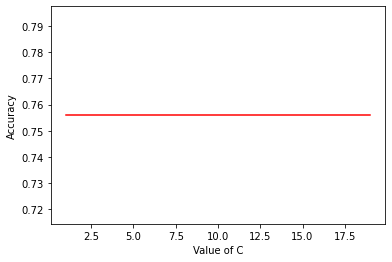

In [35]:
plt.plot(ivalue2,acc2,color='red')
plt.xlabel("Value of C")
plt.ylabel("Accuracy")